In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from pylab import meshgrid
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy import optimize
from scipy.integrate import quad

In [2]:
from functions import *

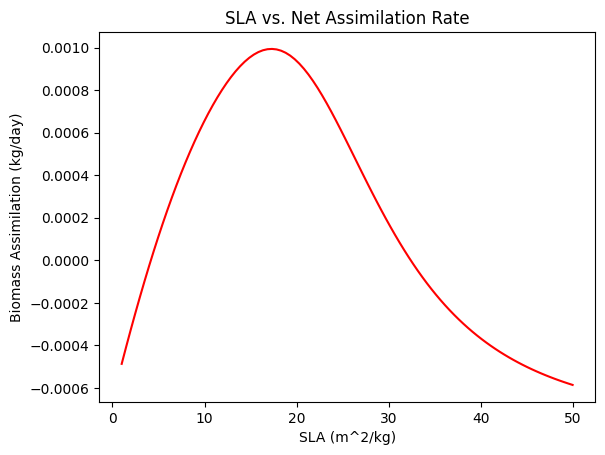

In [5]:
G_vect = np.vectorize(G_de)
x = np.linspace(1, 50, 100)
y =  G_vect(eSLA=x, h=2, p_inc=0.5, T_A=10, kappa = 1.42272727, kap=3.1269697,  gsday_s=17, gsday_e=165)[3]

plot = plt.plot(x, y, color='red')

plt.title('SLA vs. Net Assimilation Rate')
plt.xlabel('SLA (m^2/kg)')
plt.ylabel('Biomass Assimilation (kg/day)')

plt.show(plot)

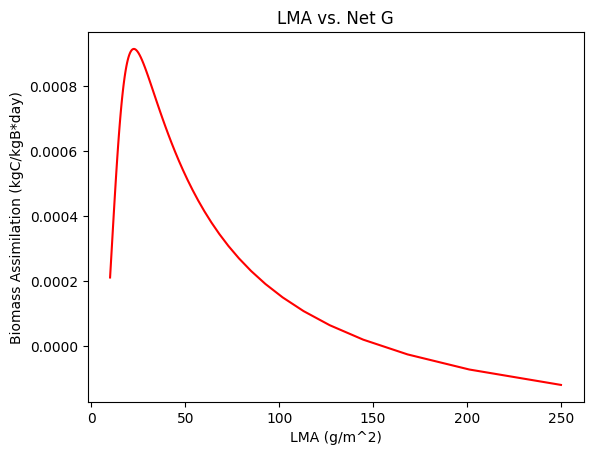

In [7]:
G_vect = np.vectorize(G_de)
x = np.linspace(4, 100, 100)
y =  G_vect(eSLA=x, h=6, p_inc=2.0, T_A=20, kap = 1.4, kappa=2.1,  gsday_s=17, gsday_e=165)[3]

plot = plt.plot(1000/x, y, color='red')

plt.title('LMA vs. Net G')
plt.xlabel('LMA (g/m^2)')
plt.ylabel('Biomass Assimilation (kgC/kgB*day)')
#plt.xticks(np.arange(min(x), max(x)))

#plt.savefig("LMA_NetG.png", dpi=300)
plt.show(plot)

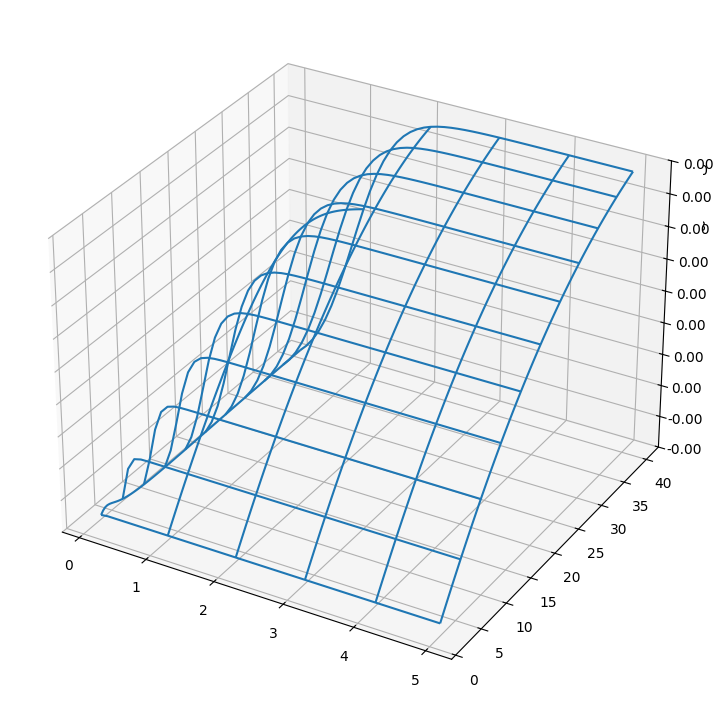

In [5]:
G_vect = np.vectorize(G_de)
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

x = np.linspace(0.1, 5, 50)
y = np.linspace(2, 40, 100)
X, Y = meshgrid(x, y)
z = G_vect(eSLA=Y, p_inc=X, h=6, kap = 1.4, kappa=2.1, gsday_s=17, gsday_e=165, T_A=20,)[3]

ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, z, rstride=10, cstride=10)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

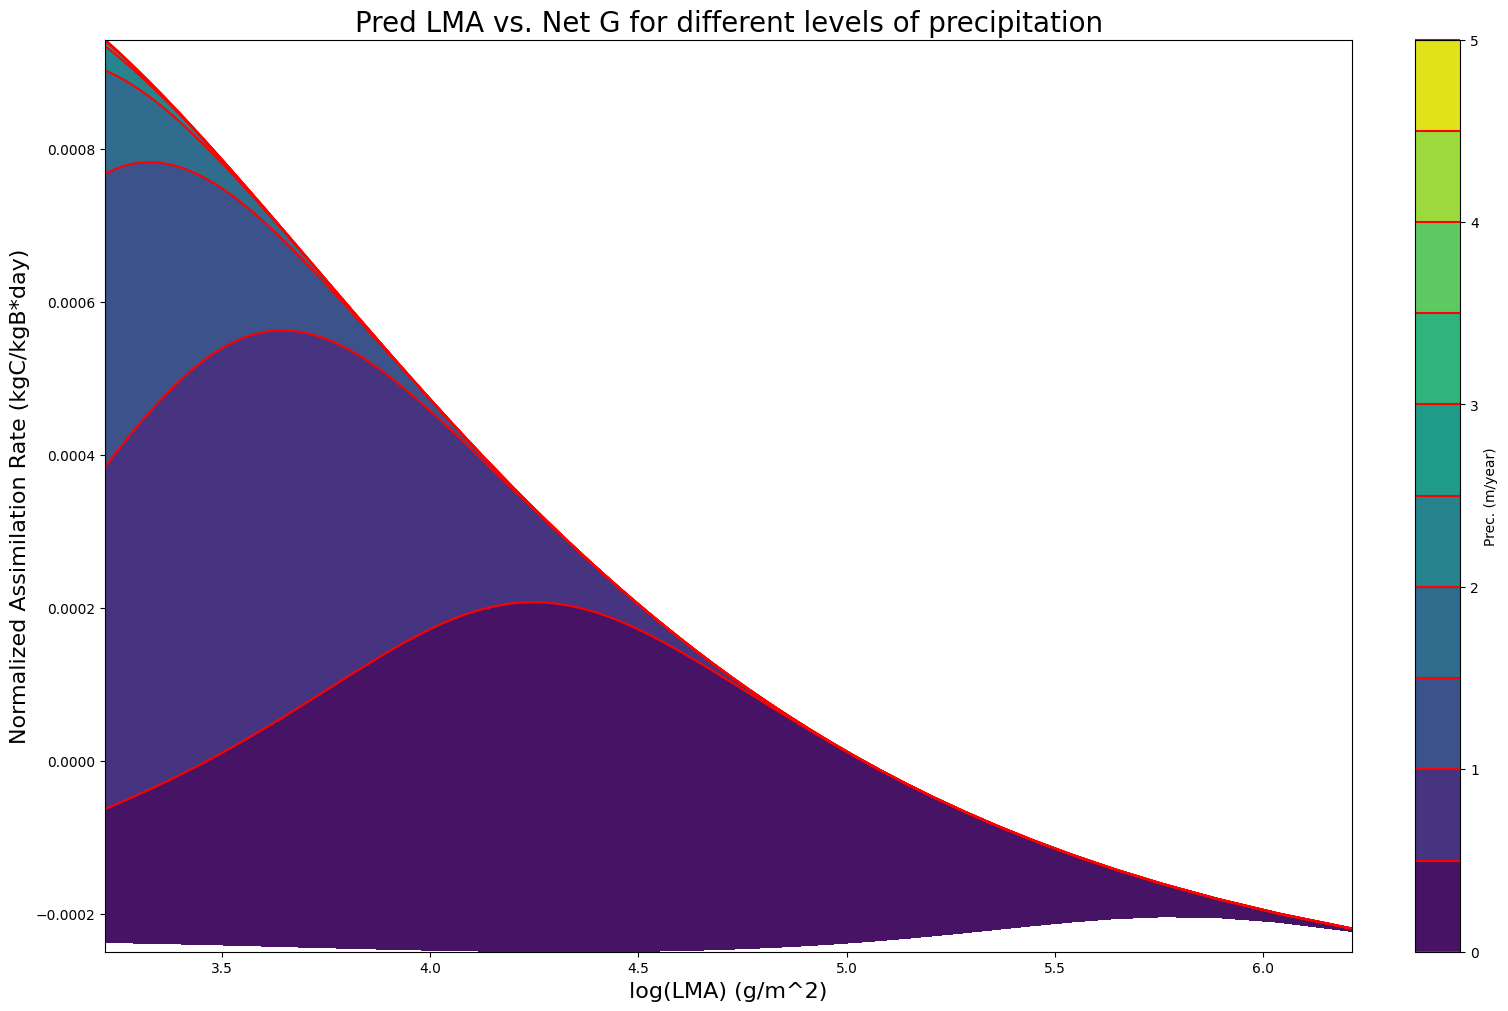

In [6]:
fig1, ax2 = plt.subplots(layout='constrained', figsize=(15,10))

CS = ax2.contourf(np.log(1000/Y), z, X, 10, cmap="viridis")

CS2 = ax2.contour(CS, levels=CS.levels[::1], colors='r')

ax2.set_title('Pred LMA vs. Net G for different levels of precipitation', fontsize=20)
ax2.set_xlabel('log(LMA) (g/m^2)', fontsize=16)
ax2.set_ylabel('Normalized Assimilation Rate (kgC/kgB*day)', fontsize=16)

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Prec. (m/year)')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

c:\Users\micho\OneDrive\Documentos\PHD\ScaledOptim\functions.py:39: RuntimeWarning: invalid value encountered in log
  kappa = np.log(beta_0-1)/(nu-gamma*Q_r0)


0.07247356152842217, 0.01179645029670886, 0.9262615560811175, 0.01179645029670886, nan
0.07247356152842217, 0.01179645029670886, 0.9262615560811175, 0.01179645029670886, nan
0.06645225034369946, 0.010816367400082585, 1.008009833296677, 0.010816367400082585, -669.4140211040851
0.06135623839691894, 0.009986894549930804, 1.0892375177326508, 0.009986894549930802, -362.9437128868044
0.05698739618993393, 0.009275782402797656, 1.1699244873279604, 0.009275782402797656, -286.6175147017807
0.053200398753142066, 0.00865937655637931, 1.2500520042064367, 0.00865937655637931, -240.1015287132055
0.0498862317291645, 0.00811993285099427, 1.3296026570010426, 0.008119932850994268, -205.02646513028253
0.04696151664578215, 0.007643879854763028, 1.4085603049881645, 0.007643879854763028, -175.65341825523126
0.04436139308473705, 0.007220660301227751, 1.4869100240035502, 0.007220660301227751, -149.50348692199205
0.0420346477333677, 0.006841938249879926, 1.5646380541096623, 0.0068419382498799254, -125.308869600

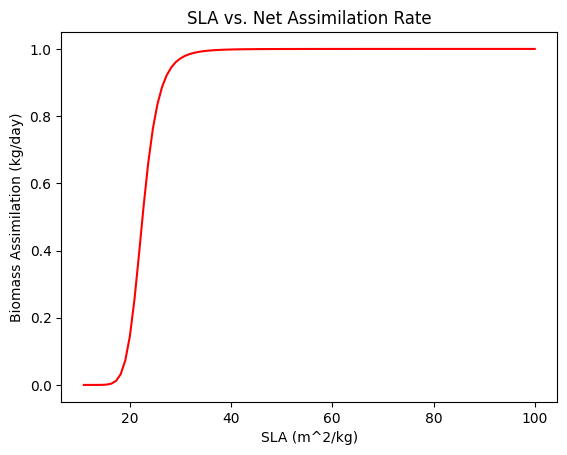

In [3]:
G_alt_vect = np.vectorize(G_de_alt)
x = np.linspace(10, 100, 100)
y =  G_alt_vect(eSLA=x, h=20, p_inc=0.1, T_A=20,  gsday_s=17, gsday_e=165, gamma=1/3, nu_half=3)[1]

plot = plt.plot(x, y, color='red')

plt.title('SLA vs. Net Assimilation Rate')
plt.xlabel('SLA (m^2/kg)')
plt.ylabel('Biomass Assimilation (kg/day)')

plt.show(plot)

0.7621554818940204, 0.017919997463248603, nan
0.7621554818940204, 0.017919997463248603, nan
0.8303563450450567, 0.01643081662409092, nan
0.8983061745635725, 0.015170453061035165, nan
0.9659914116541558, 0.014089916089482521, nan
1.033399170036921, 0.013153270822372335, -323.03982355480815
1.1005172137604242, 0.012333560327203414, -232.84297315638116
1.167333935575408, 0.011610166409851366, -192.4782756980804
1.233838335862521, 0.010967049761312995, -165.6239948749848
1.3000200021067403, 0.010391545609364275, -144.8179821025013
1.365869088910848, 0.009873520519468878, -127.29498158136009
1.4313762985399952, 0.009404770006023345, -111.74841155011202
1.4965328619890792, 0.00897858036066603, -97.4688623194095
1.561330520564442, 0.008589404736977793, -84.03454625405325
1.6257615079711498, 0.008232620179104958, -71.1781225107649
1.6898185328969588, 0.007904342938388546, -58.72194480239487
1.7534947620839112, 0.007601286390882651, -46.54363712819379
1.8167838038783766, 0.007320650515175644, -

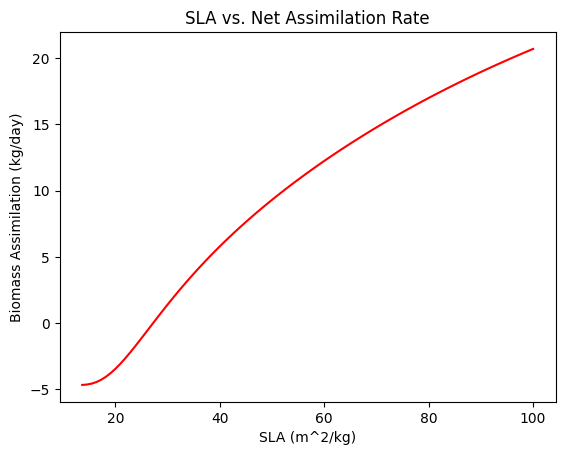

In [7]:
G_alt_vect = np.vectorize(G_de_alt)
x = np.linspace(10, 100, 100)
y =  G_alt_vect(eSLA=x, h=30, p_inc=0.1, T_A=20,  gsday_s=17, gsday_e=165, gamma=1/3, nu_half=5)[0]

plot = plt.plot(x, y, color='red')

plt.title('SLA vs. Net Assimilation Rate')
plt.xlabel('SLA (m^2/kg)')
plt.ylabel('Biomass Assimilation (kg/day)')

plt.show(plot)